In [23]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import csv
import pandas as pd  
import numpy as np
from datetime import datetime,timedelta
from scipy import stats
from fancyimpute import IterativeImputer
import plotly.express as px
from sklearn.impute import KNNImputer
#from pmdarima.arima import auto_arima
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from collections import Counter
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [14]:
df = pd.read_csv('dataset_mood_smartphone.csv')
unique_id = df['id'].unique()
df

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [15]:
pivoted = pd.read_csv('AS14.02_part2.csv')
#Make windowed dataset 
windowed = pivoted.rolling(5).mean()
windowed.insert(0, 'id', pivoted['id'])


# Create targets
targets = pivoted['mood']
targets = targets.iloc[1:]
targets = targets.append(pd.Series([np.nan]), ignore_index=True)


#Add targets to windowed dataset
windowed['target'] = targets.values
windowed

#windowed = windowed[windowed['target'].notna()]
windowed.drop('id',axis='columns', inplace=True)

model_df = windowed[:-1].fillna(0)
model_df = model_df[4:]
model_df

,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.other,appCat.social,call,circumplex.arousal,circumplex.valence,mood,screen,sms,target
4,0.141465,15.207726,38.441529,13.396807,16.126499,11.269335,1.0,0.200000,0.650000,7.066667,45.410226,0.8,7.500000
5,0.157615,12.686079,37.965728,13.396807,13.727847,12.366479,1.0,0.050000,0.640000,7.300000,52.641497,0.8,6.500000
6,0.140151,12.627419,32.812154,20.145140,13.295572,12.456798,1.0,-0.250000,0.700000,7.250000,44.391021,1.0,6.250000
7,0.112403,10.513802,33.561530,18.781465,12.839942,14.043476,1.0,-0.570000,0.700000,6.860000,45.311450,1.0,6.400000
8,0.127479,10.640038,36.703587,25.185445,12.594395,15.712430,1.0,-0.610000,0.780000,6.780000,39.891573,0.8,7.750000
9,0.125776,11.660453,38.007616,22.839191,12.437970,15.071830,1.0,-0.510000,0.780000,6.880000,38.578663,0.6,7.200000
10,0.125776,11.861121,36.314541,28.359093,12.218770,20.281689,1.0,-0.600000,0.710000,6.820000,31.186265,0.4,7.250000
11,0.155397,13.804446,38.543199,29.173099,12.006050,20.164960,1.0,-0.400000,0.650000,6.970000,30.764618,0.2,6.800000
12,0.155397,14.225589,34.956715,31.346669,11.426180,29.597579,1.0,-0.320000,0.610000,7.080000,29.633950,0.2,7.250000
13,0.140321,13.814173,35.686290,22.291050,10.795910,34.075317,1.0,-0.510000,0.500000,7.250000,31.337085,0.2,7.000000


In [16]:
train_size = int(0.8 * len(model_df))
train_df = model_df.iloc[:train_size]
test_df = model_df.iloc[train_size:]
train_df

X_train = train_df.drop('target', axis=1)
Y_train = train_df['target']

X_test = test_df.drop('target', axis=1)
Y_test = test_df['target']

Y = model_df['target']
X = model_df.drop('target', axis=1)

# Classification 

## Random forest

In [53]:
min_index_list = []

for u_id in unique_id:
    pivoted = pd.read_csv(u_id+'_part2.csv')

    #Drop columns irrelevant for predicting class
    pivoted = pivoted.drop('id', axis=1)
    pivoted = pivoted.drop('time', axis=1)

    #Window 
    windowed = pivoted.rolling(5).mean()

    # Create targets
    targets = pivoted['mood']
    targets = targets.iloc[1:]
    targets = targets.append(pd.Series([np.nan]), ignore_index=True)


    #Add targets to windowed dataset
    windowed['target'] = targets.values

    model_df = windowed[:-1].fillna(0)
    model_df = model_df[4:]
    model_df['target'] = model_df['target'].round()

    train_size = int(0.8 * len(model_df))
    train_df = model_df.iloc[:train_size]
    test_df = model_df.iloc[train_size:]

    X_train = train_df.drop('target', axis=1)
    Y_train = train_df['target']

    X_test = test_df.drop('target', axis=1)
    Y_test = test_df['target']
    
    acc_tree = []
    for i in range(1,20,10):
        # create regressor object
        rf = RandomForestClassifier(n_estimators=i)
        rf.fit(X_train, Y_train)
        Y_pred = rf.predict(X_test)
        accuracy = f1_score(Y_test.tolist(), Y_pred, average='weighted')
        acc_tree.append(accuracy)
    min_value = max(acc_tree)
    min_index = acc_tree.index(min_value)
    min_index_list.append(min_index)

In [54]:
print(Counter(min_index_list).keys()) 
print(Counter(min_index_list).values())

dict_keys([1, 0])
dict_values([9, 18])


In [52]:
acc_tree = []
f1_tree = []

for u_id in unique_id:
    pivoted = pd.read_csv(u_id+'_part2.csv')
    
    #Drop columns irrelevant for predicting class
    pivoted = pivoted.drop('id', axis=1)
    pivoted = pivoted.drop('time', axis=1)
    
    #Window 
    windowed = pivoted.rolling(5).mean()

    # Create targets
    targets = pivoted['mood']
    targets = targets.iloc[1:]
    targets = targets.append(pd.Series([np.nan]), ignore_index=True)


    #Add targets to windowed dataset
    windowed['target'] = targets.values

    model_df = windowed[:-1].fillna(0)
    model_df = model_df[4:]
    model_df['target'] = model_df['target'].round()
    
    train_size = int(0.8 * len(model_df))
    train_df = model_df.iloc[:train_size]
    test_df = model_df.iloc[train_size:]

    X_train = train_df.drop('target', axis=1)
    Y_train = train_df['target']

    X_test = test_df.drop('target', axis=1)
    Y_test = test_df['target']
    
    # Random forest
    rf = RandomForestClassifier(n_estimators=1)
    rf.fit(X_train, Y_train)
    Y_pred = rf.predict(X_test)    
    
    # Measures
    accuracy = accuracy_score(Y_test.tolist(), Y_pred)
    acc_tree.append(accuracy)
    f1 = f1_score(Y_test, Y_pred, average='weighted')
    f1_tree.append(f1)

[]

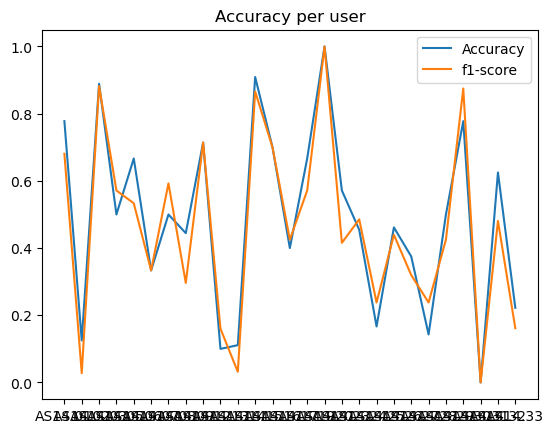

In [46]:
plt.plot(unique_id, acc_tree , label = 'Accuracy')
plt.title('Accuracy per user')
plt.plot()

plt.plot(unique_id, f1_tree, label = 'f1-score')
plt.title('Accuracy per user')
plt.legend()
plt.plot()

In [67]:
s = pd.Series(f1_tree)
s.describe()


count    27.000000
mean      0.448578
std       0.293216
min       0.000000
25%       0.214519
50%       0.476190
75%       0.620915
max       1.000000
dtype: float64

In [57]:
print(unique_id)

['AS14.01' 'AS14.02' 'AS14.03' 'AS14.05' 'AS14.06' 'AS14.07' 'AS14.08'
 'AS14.09' 'AS14.12' 'AS14.13' 'AS14.14' 'AS14.15' 'AS14.16' 'AS14.17'
 'AS14.19' 'AS14.20' 'AS14.23' 'AS14.24' 'AS14.25' 'AS14.26' 'AS14.27'
 'AS14.28' 'AS14.29' 'AS14.30' 'AS14.31' 'AS14.32' 'AS14.33']


In [61]:
lens = []
for u_id in unique_id:
    pivoted = pd.read_csv(u_id+'_part2.csv')
    lens.append(len(pivoted))

In [63]:
from scipy.stats.stats import pearsonr
print(pearsonr(lens, f1_tree))

PearsonRResult(statistic=0.21185175492142494, pvalue=0.2887693890557951)


C:\Users\a-v-d\AppData\Local\Temp\ipykernel_14428\88193888.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [66]:
print(max(lens))

69


## MLP

In [127]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from tqdm import tqdm

In [130]:
min_index_list = []
for u_id in tqdm(unique_id):
    pivoted = pd.read_csv(u_id+'_part2.csv')
    
    pivoted['target'] = pivoted.mood.shift(-1)
    pivoted = pivoted.drop('id', axis=1)
    pivoted = pivoted.drop('time', axis=1)

    pivoted['target'] = pivoted['target'].round()
    pivoted.drop(pivoted.tail(1).index,inplace=True)

    train_size = int(0.8 * len(pivoted))
    train_df = pivoted.iloc[:train_size]
    test_df = pivoted.iloc[train_size:]

    X_train = train_df.drop('target', axis=1)
    Y_train = train_df['target']

    X_test = test_df.drop('target', axis=1)
    Y_test = test_df['target']
    f1_tree = []
    for i in range(1, 20):
        # Random forest
        clf = MLPClassifier(hidden_layer_sizes= i, random_state=1, max_iter=1000).fit(X_train, Y_train)
        Y_pred = clf.predict(X_test) 

        # Measure
        f1 = f1_score(Y_test, Y_pred, average='weighted')
        f1_tree.append(f1)
    min_value = max(f1_tree)
    min_index = f1_tree.index(min_value)
    min_index_list.append(min_index)

  0%|                                                                                           | 0/27 [00:00<?, ?it/s]C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the o

 11%|█████████▏                                                                         | 3/27 [00:14<01:54,  4.79s/it]C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the o

C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_m

C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_m

C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_m

C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
 48%|███████████████████████████████████████▍                       

C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
 56%|█████████████████████████████████████████████▌                                    | 15/27 [01:13<00:59,  4.99s/it]C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the o

C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
 63%|███████████████████████████████████████████████████▋                              | 17/27 [01:23<00:50,  5.01s/it]C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the o

C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
 74%|████████████████████████████████████████████████████████████▋                     | 20/27 [01:35<00:30,  4.43s/it]C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the o

C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_m

C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
 93%|███████████████████████████████████████████████████████████████████████████▉      | 25/27 [01:57<00:08,  4.39s/it]C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the o

In [131]:
print(Counter(min_index_list).keys()) 
print(Counter(min_index_list).values())

dict_keys([7, 5, 18, 0, 3, 2, 10, 12, 17, 15, 9, 4, 16])
dict_values([1, 3, 1, 4, 3, 2, 2, 3, 1, 4, 1, 1, 1])


In [110]:
pivoted = pd.read_csv('AS14.02_part2.csv')
pivoted['target'] = pivoted.mood.shift(-1)
pivoted = pivoted.drop('id', axis=1)
pivoted = pivoted.drop('time', axis=1)

pivoted['target'] = pivoted['target'].round()

train_size = int(0.8 * len(pivoted))
train_df = pivoted.iloc[:train_size]
test_df = pivoted.iloc[train_size:]

X_train = train_df.drop('target', axis=1)
Y_train = train_df['target']

X_test = test_df.drop('target', axis=1)
Y_test = test_df['target']


In [111]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, Y_train)

clf.predict(X_test)


array([6., 6., 6., 6., 6., 7., 6., 6., 6.])

In [115]:
acc_tree = []
f1_tree = []

for u_id in unique_id:
    pivoted = pd.read_csv(u_id+'_part2.csv')
    
    pivoted['target'] = pivoted.mood.shift(-1)
    pivoted = pivoted.drop('id', axis=1)
    pivoted = pivoted.drop('time', axis=1)

    pivoted['target'] = pivoted['target'].round()
    pivoted.drop(pivoted.tail(1).index,inplace=True)

    train_size = int(0.8 * len(pivoted))
    train_df = pivoted.iloc[:train_size]
    test_df = pivoted.iloc[train_size:]

    X_train = train_df.drop('target', axis=1)
    Y_train = train_df['target']

    X_test = test_df.drop('target', axis=1)
    Y_test = test_df['target']
    
    # Random forest
    clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, Y_train)
    Y_pred = clf.predict(X_test) 
    
    # Measures
    accuracy = accuracy_score(Y_test.tolist(), Y_pred)
    acc_tree.append(accuracy)
    f1 = f1_score(Y_test, Y_pred, average='weighted')
    f1_tree.append(f1)

C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[]

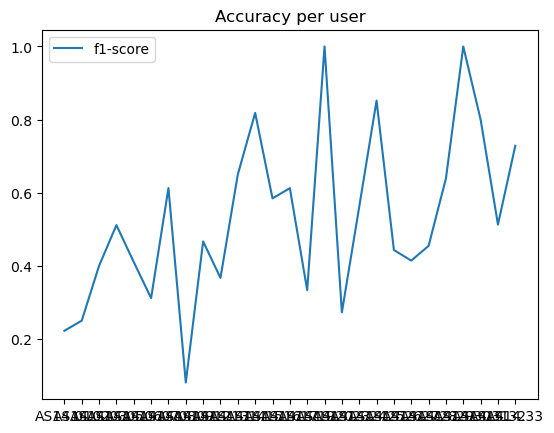

In [118]:
plt.plot(unique_id, f1_tree, label = 'f1-score')
plt.title('Accuracy per user')
plt.legend()
plt.plot()

In [117]:
s = pd.Series(f1_tree)
s.describe()

count    27.000000
mean      0.529963
std       0.232139
min       0.080808
25%       0.383442
50%       0.511364
75%       0.644444
max       1.000000
dtype: float64

In [120]:
print(pearsonr(lens, f1_tree))

PearsonRResult(statistic=0.024741403269336524, pvalue=0.9025068076339537)


# Numerical prediction

In [60]:
min_index_list = []
for u_id in unique_id:    
    pivoted = pd.read_csv(u_id+'.csv')
    windowed = pivoted.rolling(5).mean()
    windowed.insert(0, 'id', pivoted['id'])


    # Create targets
    targets = pivoted['mood']
    targets = targets.iloc[1:]
    targets = targets.append(pd.Series([np.nan]), ignore_index=True)


    #Add targets to windowed dataset
    windowed['target'] = targets.values

    #windowed = windowed[windowed['target'].notna()]
    windowed.drop('id',axis='columns', inplace=True)

    model_df = windowed[:-1].fillna(0)
    model_df = model_df[4:]
    
    train_size = int(0.8 * len(model_df))
    train_df = model_df.iloc[:train_size]
    test_df = model_df.iloc[train_size:]
    train_df

    X_train = train_df.drop('target', axis=1)
    Y_train = train_df['target']

    X_test = test_df.drop('target', axis=1)
    Y_test = test_df['target']
    MAE_tree = []
    for i in range(40, 130, 10):
        regressor = RandomForestRegressor(n_estimators=i, random_state=0)
        regressor.fit(X_train, Y_train)
        Y_pred = regressor.predict(X_test)
        errors = abs(Y_pred - Y_test)
        MAE = round(np.mean(errors), 2)
        MAE_tree.append(MAE)
    min_value = min(MAE_tree)
    min_index = MAE_tree.index(min_value)
    min_index_list.append(min_index)

C:\Users\a-v-d\AppData\Local\Temp\ipykernel_30372\3453174842.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['id', 'time'], dtype='object')
  windowed = pivoted.rolling(5).mean()
C:\Users\a-v-d\AppData\Local\Temp\ipykernel_30372\3453174842.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  targets = targets.append(pd.Series([np.nan]), ignore_index=True)
C:\Users\a-v-d\AppData\Local\Temp\ipykernel_30372\3453174842.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['id', 'time'], dtype='object')
  windowed = pivoted.rolling(5).mean()
C:\Users\a-v-d\AppData\Local\Temp

C:\Users\a-v-d\AppData\Local\Temp\ipykernel_30372\3453174842.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['id', 'time'], dtype='object')
  windowed = pivoted.rolling(5).mean()
C:\Users\a-v-d\AppData\Local\Temp\ipykernel_30372\3453174842.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  targets = targets.append(pd.Series([np.nan]), ignore_index=True)
C:\Users\a-v-d\AppData\Local\Temp\ipykernel_30372\3453174842.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['id', 'time'], dtype='object')
  windowed = pivoted.rolling(5).mean()
C:\Users\a-v-d\AppData\Local\Temp

In [57]:

print(Counter(min_index_list).keys()) # equals to list(set(words))
print(Counter(min_index_list).values())

dict_keys([0, 1, 4, 8, 3, 2, 5])
dict_values([10, 9, 2, 2, 2, 1, 1])


In [12]:



regr = make_pipeline(StandardScaler(),
                     LinearSVR(random_state=0, tol=1e-5))
regr.fit(X_train, Y_train)
Y_pred_SVM = regr.predict(X_test)

errors = abs(Y_pred_SVM - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'moods.')

Mean Absolute Error: 0.55 moods.


C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [54]:
MAE_tree = []
MAE_SVM = []


for u_id in unique_id:
    pivoted = pd.read_csv(u_id+'.csv')
    windowed = pivoted.rolling(5).mean()
    windowed.insert(0, 'id', pivoted['id'])


    # Create targets
    targets = pivoted['mood']
    targets = targets.iloc[1:]
    targets = targets.append(pd.Series([np.nan]), ignore_index=True)


    #Add targets to windowed dataset
    windowed['target'] = targets.values

    #windowed = windowed[windowed['target'].notna()]
    windowed.drop('id',axis='columns', inplace=True)

    model_df = windowed[:-1].fillna(0)
    model_df = model_df[4:]
    
    train_size = int(0.8 * len(model_df))
    train_df = model_df.iloc[:train_size]
    test_df = model_df.iloc[train_size:]
    train_df

    X_train = train_df.drop('target', axis=1)
    Y_train = train_df['target']

    X_test = test_df.drop('target', axis=1)
    Y_test = test_df['target']
    
    # create regressor object
    regressor = RandomForestRegressor(n_estimators=50, random_state=0)
    regressor.fit(X_train, Y_train)
    Y_pred = regressor.predict(X_test)
    errors = abs(Y_pred - Y_test)
    MAE = round(np.mean(errors), 2)
    MAE_tree.append(MAE)
    # print('Mean Absolute Error:', round(np.mean(errors), 2), 'moods.')
    
    regr = make_pipeline(StandardScaler(),
                     LinearSVR(random_state=0, tol=1e-5))
    regr.fit(X_train, Y_train)
    Y_pred_SVM = regr.predict(X_test)

    errors = abs(Y_pred_SVM - Y_test)
    MAE = round(np.mean(errors), 2)
    # print('Mean Absolute Error:', round(np.mean(errors), 2), 'moods.')
    MAE_SVM.append(MAE)

C:\Users\a-v-d\AppData\Local\Temp\ipykernel_30372\1742396219.py:7: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['id', 'time'], dtype='object')
  windowed = pivoted.rolling(5).mean()
C:\Users\a-v-d\AppData\Local\Temp\ipykernel_30372\1742396219.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  targets = targets.append(pd.Series([np.nan]), ignore_index=True)
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\a-v-d\AppData\Local\Temp\ipykernel_30372\1742396219.py:7: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only val

C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\a-v-d\AppData\Local\Temp\ipykernel_30372\1742396219.py:7: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['id', 'time'], dtype='object')
  windowed = pivoted.rolling(5).mean()
C:\Users\a-v-d\AppData\Local\Temp\ipykernel_30372\1742396219.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  targets = targets.append(pd.Series([np.nan]), ignore_index=True)
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\a-v-d\AppData\Local\Temp\ipyk

C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\a-v-d\AppData\Local\Temp\ipykernel_30372\1742396219.py:7: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['id', 'time'], dtype='object')
  windowed = pivoted.rolling(5).mean()
C:\Users\a-v-d\AppData\Local\Temp\ipykernel_30372\1742396219.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  targets = targets.append(pd.Series([np.nan]), ignore_index=True)
C:\Users\a-v-d\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [55]:
np.mean(MAE_tree)

0.1611111111111111

In [56]:
np.mean(MAE_SVM)

0.4396296296296296